importing libraries

In [1]:
# Import PyTorch
import torch

# We use torchvision to get our dataset and useful image transformations
import torchvision
import torchvision.transforms as transforms

# Import PyTorch's optimization libary and nn
# nn is used as the basic building block for our Network graphs
import torch.optim as optim
import torch.nn as nn

# Are we using our GPU?
print("GPU available: {}".format(torch.cuda.is_available()))

GPU available: True


importing and unzipping the dataset


In [1]:
from google.colab import files

# Upload the .zip file
uploaded = files.upload()

# Extract the contents of the .zip file
import zipfile
import io

with zipfile.ZipFile("/content/brain_tumor_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')
    zip_ref.close()

Saving brain_tumor_dataset.zip to brain_tumor_dataset.zip


In [2]:
import tensorflow as tf
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os

In [4]:
data_dir = '/content/dataset/brain_tumor_dataset'
os.listdir(data_dir)

['yes', 'no']

In [5]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 253 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

plotting a batch of both yes and no classes ( 1=yes , 0
=no)

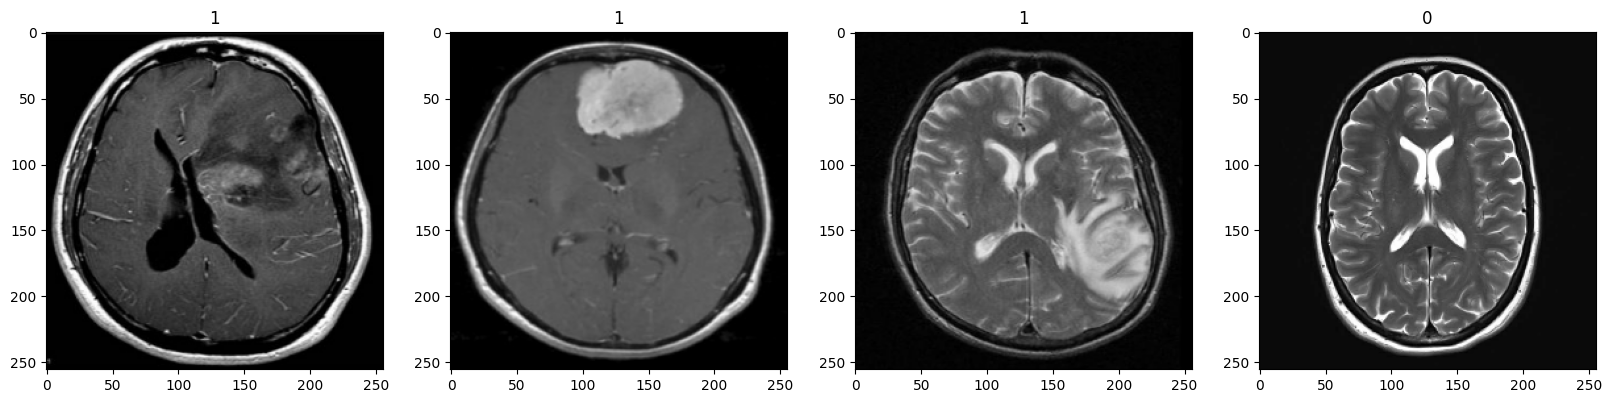

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

normalizing data

In [8]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator=data.as_numpy_iterator().next()

creating train and validation and test data

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.15)
test_size = int(len(data)*.15)

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [11]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout , SeparableConv2D, Add, Input, BatchNormalization
from tensorflow.keras import regularizers

In [12]:
model = Sequential()

residual blocks

In [13]:
'''from tensorflow.keras import layers

def residual_block(model, filters, kernel_size):
    y = SeparableConv2D(filters, kernel_size, activation='relu', padding='same')(model.output)
    y = SeparableConv2D(filters, kernel_size, activation='relu', padding='same')(y)
    y = Add()([model.output, y])  # Add skip connection
    y = MaxPooling2D(pool_size=(2, 2))(y)
    y = Dropout(0.25)(y)
    return y'''

"from tensorflow.keras import layers\n\ndef residual_block(model, filters, kernel_size):\n    y = SeparableConv2D(filters, kernel_size, activation='relu', padding='same')(model.output)\n    y = SeparableConv2D(filters, kernel_size, activation='relu', padding='same')(y)\n    y = Add()([model.output, y])  # Add skip connection\n    y = MaxPooling2D(pool_size=(2, 2))(y)\n    y = Dropout(0.25)(y)\n    return y"

In [14]:
''' model = Sequential()
model.add(Input(shape=(256, 256, 3)))

model.add(SeparableConv2D(32, kernel_size=(3,3), activation='relu', padding='same'))


# First residual block
model.add(residual_block(model, filters=32, kernel_size=(3, 3)))

# Second residual block
#model.add(residual_block(model.layers[-1].output, filters=128, kernel_size=(3, 3)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))'''

" model = Sequential()\nmodel.add(Input(shape=(256, 256, 3)))\n\nmodel.add(SeparableConv2D(32, kernel_size=(3,3), activation='relu', padding='same'))\n\n\n# First residual block\nmodel.add(residual_block(model, filters=32, kernel_size=(3, 3)))\n\n# Second residual block\n#model.add(residual_block(model.layers[-1].output, filters=128, kernel_size=(3, 3)))\n\n# Flatten layer\nmodel.add(Flatten())\n\n# Dense layers\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dense(1, activation='sigmoid'))"

In [15]:
#model.add(SeparableConv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(SeparableConv2D(64, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))

In [16]:
model = Sequential()
model.add(SeparableConv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.25))  # Dropout rate reduced to 0.25
model.add(SeparableConv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())  # Add Batch Normalization
model.add(Dropout(0.25))  # Dropout rate reduced to 0.25
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # Add L2 Regularization
model.add(Dropout(0.25))  # Increased dropout rate
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separabl  (None, 254, 254, 32)      155       
 eConv2D)                                                        
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 127, 127, 32)      128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 separable_conv2d_1 (Separa  (None, 125, 125, 64)      2400      
 bleConv2D)                                           

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

In [20]:
'''logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=30, validation_data=val,  callbacks=[tensorboard_callback])'''

"logdir='logs'\ntensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)\nhist = model.fit(train, epochs=30, validation_data=val,  callbacks=[tensorboard_callback])"

#cosine annealing

In [21]:
from tensorflow.keras.experimental import CosineDecay
from tensorflow.keras.callbacks import LearningRateScheduler

In [23]:
initial_learning_rate = 0.01
num_epochs=30

cosine_decay = tf.keras.experimental.CosineDecay(initial_learning_rate, num_epochs)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(cosine_decay)

#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
#hist = model.fit(train, epochs=50, validation_data=val, callbacks=[lr_scheduler])

In [98]:
test_loss, test_accuracy = model.evaluate(test)

print('Test accuracy:', test_accuracy)

1/1 [==============================] - 0s 486ms/step - loss: 21.7110 - accuracy: 0.9375
Test accuracy: 0.9375


loss and accuracy

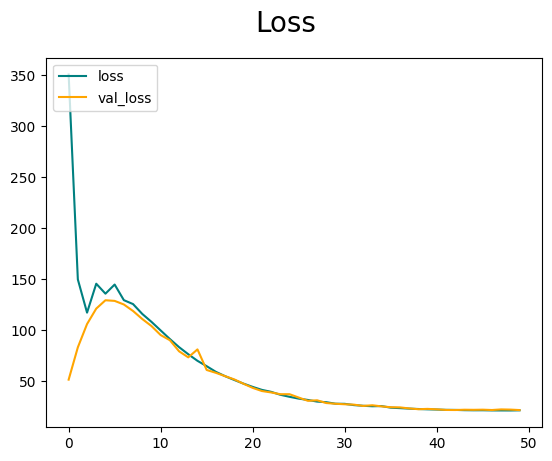

In [101]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

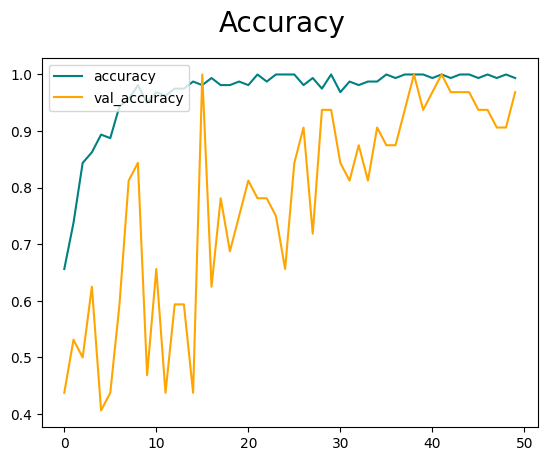

In [102]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#reduce lr on plateau

In [103]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [104]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


In [105]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[reduce_lr])

Epoch 1/30
5/5 [==============================] - 2s 285ms/step - loss: 21.1066 - accuracy: 0.9937 - val_loss: 22.5225 - val_accuracy: 0.9062 - lr: 9.8664e-06
Epoch 2/30
5/5 [==============================] - 2s 326ms/step - loss: 21.0785 - accuracy: 1.0000 - val_loss: 21.1413 - val_accuracy: 0.9688 - lr: 9.8664e-06
Epoch 3/30
5/5 [==============================] - 2s 286ms/step - loss: 21.0758 - accuracy: 1.0000 - val_loss: 21.1794 - val_accuracy: 0.9688 - lr: 9.8664e-06
Epoch 4/30
5/5 [==============================] - 2s 288ms/step - loss: 21.2391 - accuracy: 0.9937 - val_loss: 21.0830 - val_accuracy: 1.0000 - lr: 9.8664e-06
Epoch 5/30
5/5 [==============================] - 2s 285ms/step - loss: 21.1166 - accuracy: 0.9937 - val_loss: 22.2338 - val_accuracy: 0.9062 - lr: 9.8664e-06
Epoch 6/30
5/5 [==============================] - 2s 357ms/step - loss: 21.1012 - accuracy: 0.9937 - val_loss: 21.0816 - val_accuracy: 1.0000 - lr: 9.8664e-06
Epoch 7/30
5/5 [==============================

loss and accuracy

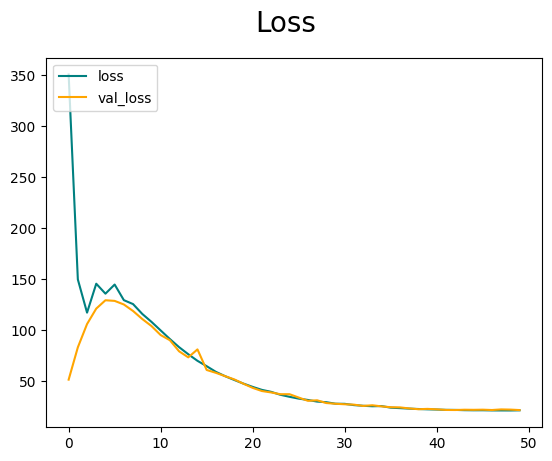

In [106]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

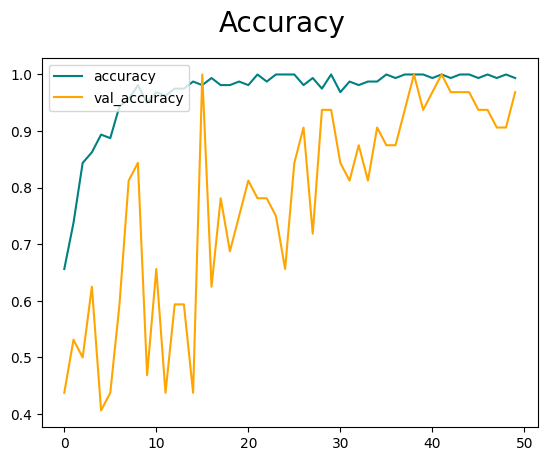

In [107]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

evaluate the trained model on the test dataset

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict labels for the test set
test_predictions = model.predict(test)
test_predictions = np.argmax(test_predictions, axis=-1)

# Extract true labels from the test set
test_labels = []
for _, label in test:
    test_labels.append(label.numpy())

test_labels = np.concatenate(test_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate overall accuracy
overall_accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
print("Overall Accuracy:", overall_accuracy)

# Calculate precision, recall, and F1-score using classification report
report = classification_report(test_labels, test_predictions, digits=4)
print("Classification Report:")
print(report)


1/1 [==============================] - 2s 2s/step
Confusion Matrix:
[[ 9  0]
 [23  0]]
Overall Accuracy: 0.28125
Classification Report:
              precision    recall  f1-score   support

           0     0.2812    1.0000    0.4390         9
           1     0.0000    0.0000    0.0000        23

    accuracy                         0.2812        32
   macro avg     0.1406    0.5000    0.2195        32
weighted avg     0.0791    0.2812    0.1235        32



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
